In [1]:
import os
import csv
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
# Changing Directory
os.chdir("A:\\WebEconomics\\dataset")


In [3]:
# Reading Data
df = pd.read_csv('train.csv')

In [4]:
# Define our features
features = ["click", "weekday", "hour", "region", "slotwidth", 'slotheight']
df = df[features]

In [5]:
df['slotsize'] = df['slotwidth'] * df['slotheight'] 
df.drop(['slotwidth', 'slotheight'], axis=1, inplace=True)

In [6]:
df.head()

,click,weekday,hour,region,slotsize
0,0,1,14,80,28080
1,0,2,20,94,62500
2,0,5,9,216,94080
3,0,2,20,216,65520
4,0,6,9,40,85500


In [7]:
dfNoClick = df[df['click']==0]
dfClick = df[df['click']==1]

In [8]:
dfNoClick.head()

,click,weekday,hour,region,slotsize
0,0,1,14,80,28080
1,0,2,20,94,62500
2,0,5,9,216,94080
3,0,2,20,216,65520
4,0,6,9,40,85500


In [9]:
dfClick.head()

,click,weekday,hour,region,slotsize
1104,1,6,16,333,65520
2273,1,1,0,94,94080
2406,1,0,18,27,75000
2609,1,4,0,216,75000
4383,1,4,20,27,90000


## Labeling and Categorising Data

Categorising:
- Hour: 
    - 0:00~07:59 : 1
    - 08:00~15:59: 2
    - 16:00~23:59: 3
- Size:
    - 0~40000     : 1
    - 40000~80000 : 2
    - 80000~120000: 3

### DF

In [10]:
df['hour'] = pd.cut(df['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
df['slotsize'] = pd.cut(df['slotsize'], bins = [0,40000,80000,120000], right=True, labels=[1,2,3])
df.head()  

,click,weekday,hour,region,slotsize
0,0,1,2,80,1
1,0,2,3,94,2
2,0,5,2,216,3
3,0,2,3,216,2
4,0,6,2,40,3


### DFNoClick

In [11]:
dfNoClick['hour'] = pd.cut(dfNoClick['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
dfNoClick['slotsize'] = pd.cut(dfNoClick['slotsize'], bins = [0,40000,80000,120000], \
                               right=True, labels=[1,2,3])
dfNoClick.head()   

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,click,weekday,hour,region,slotsize
0,0,1,2,80,1
1,0,2,3,94,2
2,0,5,2,216,3
3,0,2,3,216,2
4,0,6,2,40,3


### DFClick

In [12]:
dfClick['hour'] = pd.cut(dfClick['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
dfClick['slotsize'] = pd.cut(dfClick['slotsize'], bins = [0,40000,80000,120000], right=True, labels=[1,2,3])
dfClick.head()     

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,click,weekday,hour,region,slotsize
1104,1,6,3,333,2
2273,1,1,1,94,3
2406,1,0,3,27,2
2609,1,4,1,216,2
4383,1,4,3,27,3


## GroupBy Desired Features

In [13]:
desiredFeatures = ["click", "weekday", "hour", "region", 'slotsize']

### DFNoClick

In [14]:
#dfCatNoClick = dfNoClick.groupby(desiredFeatures).size().rename(columns={0:'NoClick_count'})
#dfCatNoClick.head()

In [15]:
dfCatNoClick = dfNoClick.groupby(desiredFeatures).size().reset_index().rename(columns={0:'NoClick_count'})
dfCatNoClick.head()

,click,weekday,hour,region,slotsize,NoClick_count
0,0,0,1,0,1,18
1,0,0,1,0,2,1614
2,0,0,1,0,3,709
3,0,0,1,1,1,65
4,0,0,1,1,2,1186


### DFClick

In [16]:
#dfClickCat = dfClick.groupby(desiredFeatures).size().rename(columns={0:'Click_count'}).to_frame()
dfClickCat = dfClick.groupby(desiredFeatures).size().reset_index().rename(columns={0:'Click_count'})
dfClickCat.head()

,click,weekday,hour,region,slotsize,Click_count
0,1,0,1,0,2,2
1,1,0,1,0,3,1
2,1,0,1,1,2,1
3,1,0,1,1,3,1
4,1,0,1,15,2,1


## Mering DFNoClick and DFClick

In [17]:
ndf = pd.merge(dfClickCat.iloc[:,1:6], dfCatNoClick.iloc[:,1:6], \
               how='outer', on= ["weekday", "hour", "region", 'slotsize'], \
              sort=False)
ndf.head()

,weekday,hour,region,slotsize,Click_count,NoClick_count
0,0.0,1.0,0.0,2.0,2.0,1614
1,0.0,1.0,0.0,3.0,1.0,709
2,0.0,1.0,1.0,2.0,1.0,1186
3,0.0,1.0,1.0,3.0,1.0,674
4,0.0,1.0,15.0,2.0,1.0,591


In [18]:
ndf = ndf.fillna(0)
ndf.head()

,weekday,hour,region,slotsize,Click_count,NoClick_count
0,0.0,1.0,0.0,2.0,2.0,1614
1,0.0,1.0,0.0,3.0,1.0,709
2,0.0,1.0,1.0,2.0,1.0,1186
3,0.0,1.0,1.0,3.0,1.0,674
4,0.0,1.0,15.0,2.0,1.0,591


In [19]:
ndf['Click_total'] = ndf["NoClick_count"] + ndf["Click_count"]
ndf.head()

,weekday,hour,region,slotsize,Click_count,NoClick_count,Click_total
0,0.0,1.0,0.0,2.0,2.0,1614,1616.0
1,0.0,1.0,0.0,3.0,1.0,709,710.0
2,0.0,1.0,1.0,2.0,1.0,1186,1187.0
3,0.0,1.0,1.0,3.0,1.0,674,675.0
4,0.0,1.0,15.0,2.0,1.0,591,592.0


## CTR

In [20]:
ndf['CTR'] = ndf["Click_count"] / ndf["Click_total"]
ndf.head()

,weekday,hour,region,slotsize,Click_count,NoClick_count,Click_total,CTR
0,0.0,1.0,0.0,2.0,2.0,1614,1616.0,0.001238
1,0.0,1.0,0.0,3.0,1.0,709,710.0,0.001408
2,0.0,1.0,1.0,2.0,1.0,1186,1187.0,0.000842
3,0.0,1.0,1.0,3.0,1.0,674,675.0,0.001481
4,0.0,1.0,15.0,2.0,1.0,591,592.0,0.001689


## CSV

In [21]:
ndf.to_csv('ndf1.csv', encoding='utf‐8')

## Observing CTR

In [22]:
print(ndf['CTR'].describe())
print("variance:", ndf['CTR'].var())
print("skewness:", st.skew(ndf['CTR'],bias=False)) 
print("kurtosis:", st.kurtosis(ndf['CTR'],bias=False)) 

count    2165.000000
mean        0.000894
std         0.005691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000887
max         0.250000
Name: CTR, dtype: float64
variance: 3.238858274030966e-05
skewness: 39.0482237638901
kurtosis: 1698.9802573598884


### Plotting

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


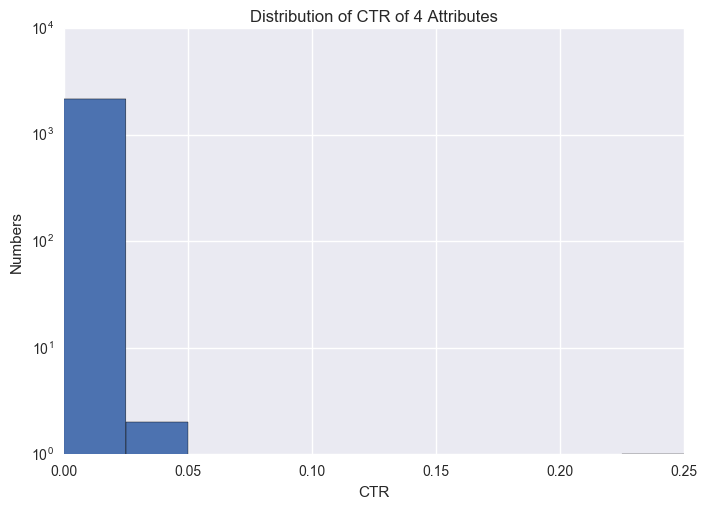

In [23]:
plt.xlabel('CTR')
plt.ylabel('Numbers')
ndf['CTR'].hist()
plt.yscale("log")
plt.title("Distribution of CTR of 4 Attributes")
plt.legend()
plt.show()

### Leaving Outliers

Reference: [Detect and exclude outliers in Pandas dataframe](http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe)

In [24]:
#ndf[(np.abs(stats.zscore(ndf['CTR'])) < 3)]

In [25]:
ndf.shape

(2165, 8)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


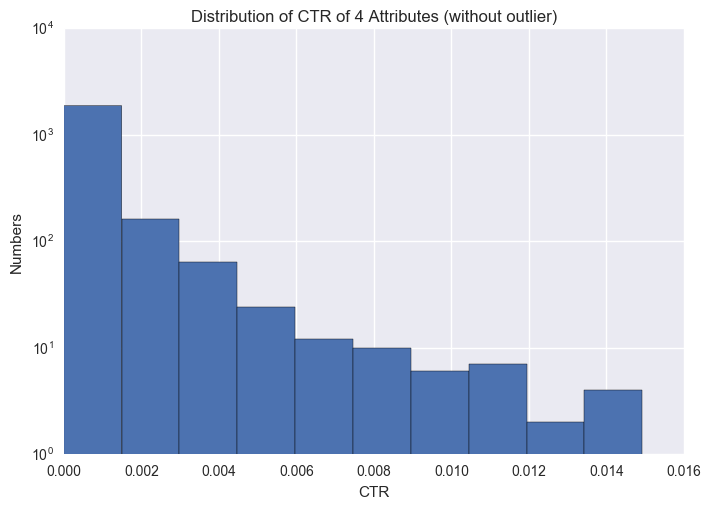

In [26]:
noOutlierNDF = ndf[(np.abs(st.zscore(ndf['CTR'])) < 3)]

plt.xlabel('CTR')
plt.ylabel('Numbers')
noOutlierNDF['CTR'].hist()
plt.yscale("log")
plt.title("Distribution of CTR of 4 Attributes (without outlier)")
plt.legend()
plt.show()

# Biding Price for Test Data

The median of Bid Price is 272.923304

In [27]:
# Reading Data
dfTest = pd.read_csv('test.csv')

In [28]:
# Define our features
featuresTest = ["bidid", "weekday", "hour", "region", "slotwidth", 'slotheight']
dfTest = dfTest[featuresTest]

In [29]:
dfTest['slotsize'] = dfTest['slotwidth'] * dfTest['slotheight'] 
dfTest.drop(['slotwidth', 'slotheight'], axis=1, inplace=True)
dfTest.insert(0, 'order', pd.Series(range(0,dfTest.shape[0]+1)))

In [30]:
dfTest.head()

,order,bidid,weekday,hour,region,slotsize
0,0,fe2e06dff1dfd227471fd1ca717888ac,0,17,80,75000
1,1,92ea762b7b2cfd7aee30a2e88e1f5899,5,22,1,90000
2,2,617dfab714eedf4988c4aa9ad5425eca,2,13,3,90000
3,3,7fa016aaa3db39413b482f757facc3f4,4,17,40,94080
4,4,49db062ac10d19591dc7d988d730aad5,6,20,146,90000


In [31]:
dfTest['hour'] = pd.cut(dfTest['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
dfTest['slotsize'] = pd.cut(dfTest['slotsize'], bins = [0,40000,80000,120000], \
                            right=True, labels=[1,2,3])
dfTest.head() 

,order,bidid,weekday,hour,region,slotsize
0,0,fe2e06dff1dfd227471fd1ca717888ac,0,3,80,2
1,1,92ea762b7b2cfd7aee30a2e88e1f5899,5,3,1,3
2,2,617dfab714eedf4988c4aa9ad5425eca,2,2,3,3
3,3,7fa016aaa3db39413b482f757facc3f4,4,3,40,3
4,4,49db062ac10d19591dc7d988d730aad5,6,3,146,3


In [32]:
dfMerge = ndf[["weekday", "hour", "region", 'slotsize', 'CTR']]
dfMerge.columns = ["weekday", "hour", "region", 'slotsize', 'Expected_CTR']
dfTest = pd.merge(dfTest, dfMerge, how = 'inner', on= ["weekday", "hour", "region", 'slotsize'],\
                 sort=False)
dfTest = dfTest.sort('order')
dfTest.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,order,bidid,weekday,hour,region,slotsize,Expected_CTR
0,0,fe2e06dff1dfd227471fd1ca717888ac,0,3,80,2.0,0.000370
1196,1,92ea762b7b2cfd7aee30a2e88e1f5899,5,3,1,3.0,0.000366
1517,2,617dfab714eedf4988c4aa9ad5425eca,2,2,3,3.0,0.000611
1900,3,7fa016aaa3db39413b482f757facc3f4,4,3,40,3.0,0.000323
2268,4,49db062ac10d19591dc7d988d730aad5,6,3,146,3.0,0.001175


In [33]:
dfTest.to_csv('trytry.csv', encoding='utf-8')

In [34]:
dfTest['Bid_Price_Mean'] = 272.923304 * (dfTest['Expected_CTR']/ndf['CTR'].mean()) 
dfTest['Bid_Price_Median'] = 272.923304 * (dfTest['Expected_CTR']/np.median(ndf['CTR'])) 
dfTest.head(10)

,order,bidid,weekday,hour,region,slotsize,Expected_CTR,Bid_Price_Mean,Bid_Price_Median
0,0,fe2e06dff1dfd227471fd1ca717888ac,0,3,80,2.0,0.000370,112.898071,inf
1196,1,92ea762b7b2cfd7aee30a2e88e1f5899,5,3,1,3.0,0.000366,111.843529,inf
1517,2,617dfab714eedf4988c4aa9ad5425eca,2,2,3,3.0,0.000611,186.462799,inf
1900,3,7fa016aaa3db39413b482f757facc3f4,4,3,40,3.0,0.000323,98.749299,inf
2268,4,49db062ac10d19591dc7d988d730aad5,6,3,146,3.0,0.001175,358.652507,inf
2859,5,6d86a43fbda12fc89c98620f4d8aedc1,1,2,275,2.0,0.000487,148.725199,inf
3123,6,3b6b3f3227d42ad74971be4b9a26c189,1,3,216,3.0,0.000752,229.746301,inf
4144,7,2cc65c3a9f97620d33d4c3ddfb368869,6,1,216,2.0,0.000530,161.722899,inf
5343,8,be487ced968062be378892fc87013ff9,5,3,1,2.0,0.000000,0.000000,NaN
5461,9,7f7a7e763db7ec8123ddeb8a8c90689f,3,3,146,2.0,0.000326,99.473150,inf


In [35]:
dfTest = dfTest[["bidid", "Bid_Price_Mean"]]
dfTest.columns = ["bidid", "bidprice"]
dfTest.to_csv('dfTest.csv', encoding='utf‐8')

## Observing Bid Price Mean

In [36]:
print(dfTest['bidprice'].describe())
print("variance:", dfTest['bidprice'].var())
print("skewness:", st.skew(dfTest['bidprice'],bias=False)) 
print("kurtosis:", st.kurtosis(dfTest['bidprice'],bias=False)) 

count    299743.000000
mean        230.505258
std         317.031207
min           0.000000
25%          76.104894
50%         184.268457
75%         294.211634
max       76333.208491
Name: bidprice, dtype: float64
variance: 100508.78594421234
skewness: 50.52663240420146
kurtosis: 11138.434758557629


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


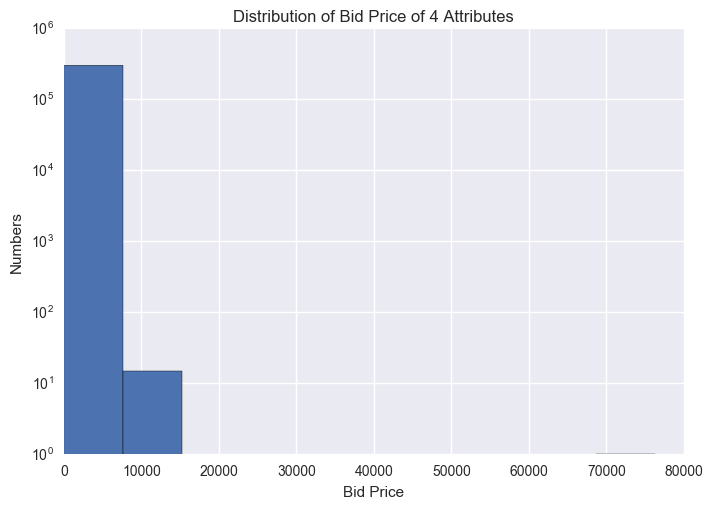

In [37]:
plt.xlabel('Bid Price')
plt.ylabel('Numbers')
dfTest['bidprice'].hist()
plt.yscale("log")
plt.title("Distribution of Bid Price of 4 Attributes")
plt.legend()
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


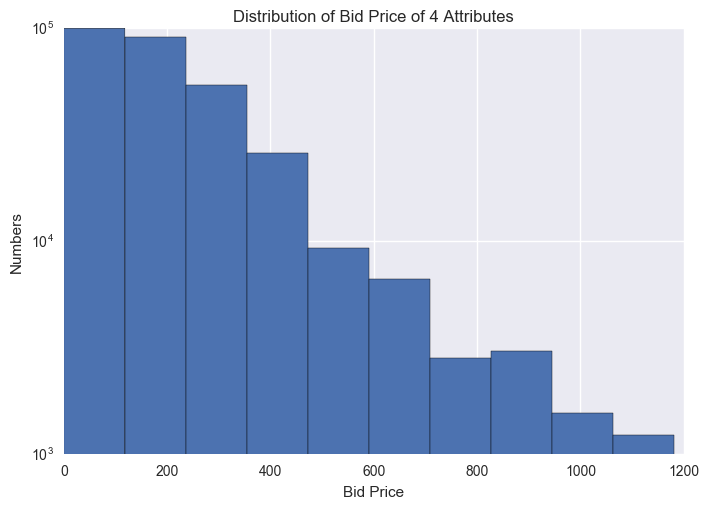

In [38]:
noOutlierTest = dfTest[(np.abs(st.zscore(dfTest['bidprice']) < 3))]


plt.xlabel('Bid Price')
plt.ylabel('Numbers')
noOutlierTest['bidprice'].hist()
plt.yscale("log")
plt.title("Distribution of Bid Price of 4 Attributes")
plt.legend()
plt.show()